# THE SPARK FOUNDATION GRIP
# TASK1: PREDICTION USING SUPERVISED MACHINE LEARNING
# AUTHOR: MALLEESWARI G

# Linear Regression
Linear regression is used for finding linear relationship between target and one or more predictors. In this model, we are going to predict the score of the student as a target variable and the numbers of hours studied as a predictor variable. Here it is about the single variable so we will be Linear Regression and for multiple variables we will be using the Multiple regression modelling.
    

In [92]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [93]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# view the dataset for the consistency

In [94]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [95]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [96]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [97]:
# understand the data-types

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# there are no null values in the dataset and we can further proceed with using it

# descriptive statistics

In [99]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


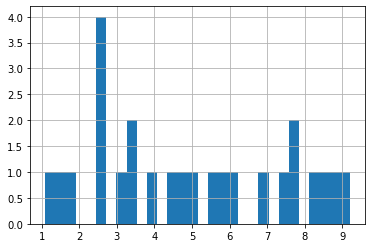

In [100]:
data['Hours'].hist(bins=30) # Histogram use to find the distribution of the data variable

# Here we can see that 2.30-2.45 hours is the most prefered time of study.

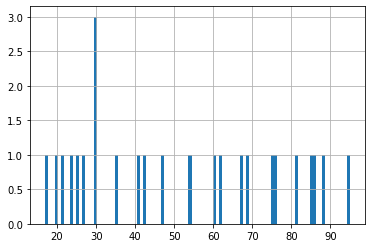

In [101]:
data['Scores'].hist(bins=100)

# here the 30 is the score which has more frequency than other scores.

In [102]:
correlation_matrix=data.corr()

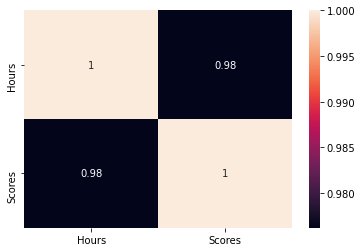

In [103]:
sns.heatmap(data=correlation_matrix, annot=True)

In [104]:
# Here the correlation score is about 0.98 which is highly correlated for the two variables.

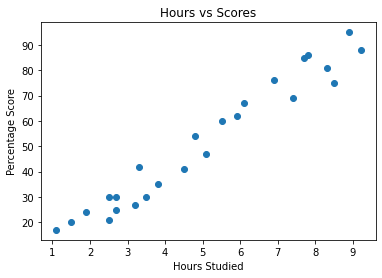

In [106]:
features = data['Hours']
target = data['Scores']
plt.scatter(features,target,marker='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# The datapoints are linearly related and it is positively correlated.

In [107]:
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [119]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [120]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Training the model

In [122]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
print("Training got completed")

Training got completed


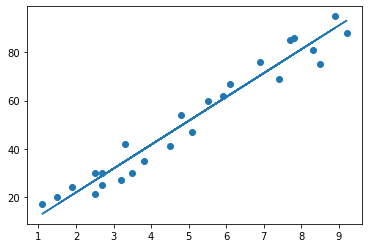

In [123]:
# Plotting the regression line
reg_line = lin_model.coef_*X+lin_model.intercept_ #REGRESSION EQUATION

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X,reg_line);
plt.show()

# Making Predictions

In [124]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [125]:
y_predict=lin_model.predict(X_test)

In [126]:
y_predict     

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [140]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [138]:
df

,0
16.884145,20
33.732261,27
75.357018,69
26.794801,30
60.491033,62


# testing the model

In [143]:
hours = [[9.25]]
new_data= lin_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_data[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Error check using Mean absolute error method to know our model error percentage otherwise it can called as a metrics.

In [144]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
